# House Keeping

In [1]:
from cassia.cassia import Cassia
import pandas as pd

import json

from pydantic import BaseModel, condecimal
from datetime import datetime

from cassia.cassia import Cassia

import warnings
warnings.filterwarnings('ignore')

# Mimic API Input

In [2]:
class VesselInfo(BaseModel):
    draught: condecimal(gt=0, decimal_places=2)
    dwt: condecimal(gt=0, decimal_places=2)
    name: str
    imo: int

class TidalWindowInput(BaseModel):
    port_id: str  # Assuming this is the UNLOCODE
    vessel_information: VesselInfo 
    arrival_datetime: datetime

# Example usage of Brisbane with 01/03 2024 with the Epiphania ship
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # "EPIPHANIA"
unlocode = 'AUBNE'  # Brisbane

# Mimic API
vessel_info = VesselInfo(
    draught=14.45,
    dwt=80276.0,
    name="EPIPHANIA",
    imo=imo
)

# Pydantic mimic
tidal_window_input = TidalWindowInput(
    port_id=unlocode,
    vessel_information=vessel_info,
    arrival_datetime=arrival_time
)

# JSON to show output
json_output = tidal_window_input.json()
print(json.dumps(json.loads(json_output), indent=2))


{
  "port_id": "AUBNE",
  "vessel_information": {
    "draught": "14.45",
    "dwt": "80276.0",
    "name": "EPIPHANIA",
    "imo": 9582116
  },
  "arrival_datetime": "2024-03-01T00:00:00"
}


# Part 1 - Tidal Windows

With the input from the API, the tool is instanciated and used to calculate any timeslot where the ships can safely enter the harbor without having water depth issues.

A list of timestamps is returned, first being when its safe and second being when its no longer safe.

In [3]:
cassia = Cassia()

# Extract parameters from Pydantic class
imo = tidal_window_input.vessel_information.imo
unlocode = tidal_window_input.port_id
arrival_time = tidal_window_input.arrival_datetime

tidal_windows = cassia.get_tidal_windows(
    imo=imo,
    unlocode=unlocode,
    arrival_time=arrival_time
)

tidal_windows


([(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-03-01 06:07:00')),
  (Timestamp('2024-03-01 07:30:00'), Timestamp('2024-03-01 17:28:00')),
  (Timestamp('2024-03-01 23:39:00'), Timestamp('2024-03-02 18:10:00')),
  (Timestamp('2024-03-02 20:54:00'), Timestamp('2024-03-03 19:10:00')),
  (Timestamp('2024-03-04 05:18:00'), Timestamp('2024-03-04 20:26:00')),
  (Timestamp('2024-03-04 22:38:00'), Timestamp('2024-03-05 21:45:00')),
  (Timestamp('2024-03-06 13:45:00'), Timestamp('2024-03-06 22:45:00')),
  (Timestamp('2024-03-07 01:38:00'), Timestamp('2024-03-07 12:50:00')),
  (Timestamp('2024-03-07 15:17:00'), Timestamp('2024-03-08 08:41:00')),
  (Timestamp('2024-03-08 16:23:00'), Timestamp('2024-03-09 00:22:00')),
  (Timestamp('2024-03-09 04:07:00'), Timestamp('2024-03-09 13:54:00')),
  (Timestamp('2024-03-09 17:18:00'), Timestamp('2024-03-10 01:11:00')),
  (Timestamp('2024-03-10 05:06:00'), Timestamp('2024-03-10 14:29:00')),
  (Timestamp('2024-03-10 18:03:00'), Timestamp('2024-03-11 02:03

# Part 2 - Tidal and Daylight Windows

Like part 1, the same procedure is done, this time taking into account the daylight for each timestamp, for each harbor using the Astral API.

In [4]:
cassia.get_combined_windows(
    imo=imo, 
    unlocode=unlocode, 
    arrival_time=arrival_time
)

[(Timestamp('2024-03-01 08:18:30.338767'), Timestamp('2024-03-01 17:28:00')),
 (Timestamp('2024-03-02 08:17:29.574026'), Timestamp('2024-03-02 18:10:00')),
 (Timestamp('2024-03-03 08:16:28.227864'), Timestamp('2024-03-03 19:10:00')),
 (Timestamp('2024-03-04 08:15:26.329444'),
  Timestamp('2024-03-04 19:42:45.595504')),
 (Timestamp('2024-03-05 08:14:23.907886'),
  Timestamp('2024-03-05 19:43:20.680000')),
 (Timestamp('2024-03-06 13:45:00'), Timestamp('2024-03-06 19:43:55.428931')),
 (Timestamp('2024-03-07 08:12:17.611526'), Timestamp('2024-03-07 12:50:00')),
 (Timestamp('2024-03-07 15:17:00'), Timestamp('2024-03-07 19:44:29.853367')),
 (Timestamp('2024-03-08 08:11:13.794634'), Timestamp('2024-03-08 08:41:00')),
 (Timestamp('2024-03-08 16:23:00'), Timestamp('2024-03-08 19:45:03.964727')),
 (Timestamp('2024-03-09 08:10:09.570405'), Timestamp('2024-03-09 13:54:00')),
 (Timestamp('2024-03-09 17:18:00'), Timestamp('2024-03-09 19:45:37.774737')),
 (Timestamp('2024-03-10 08:09:04.967578'), Tim

# Part 3 - Visualizations and Explainations

Part 3 is plotting and explaining the analysis of harbor and/or sunlight restrictions for a vessel.

Each plot contains the total depth (harbor + tide), vessel draught and windows where its possible to enter for each vessel.

The combined plot also contains a daylight and combined window, the latter representing when its possible to enter, with both constraints.

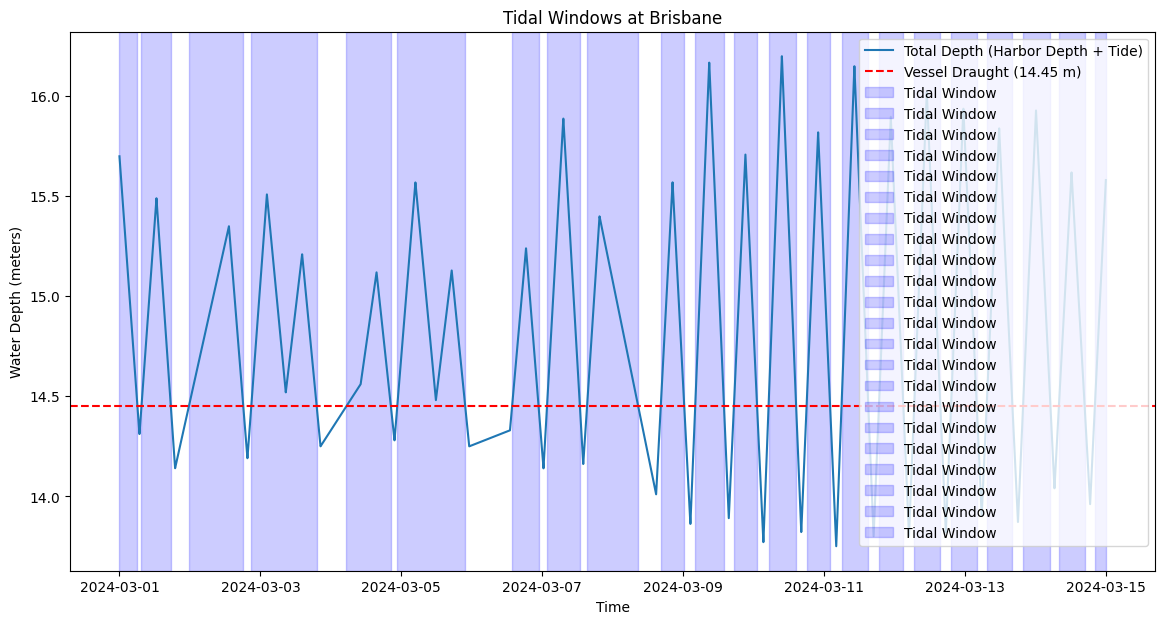

In [5]:
cassia.plot_tidal_windows(
    imo=imo,
    unlocode=unlocode
)

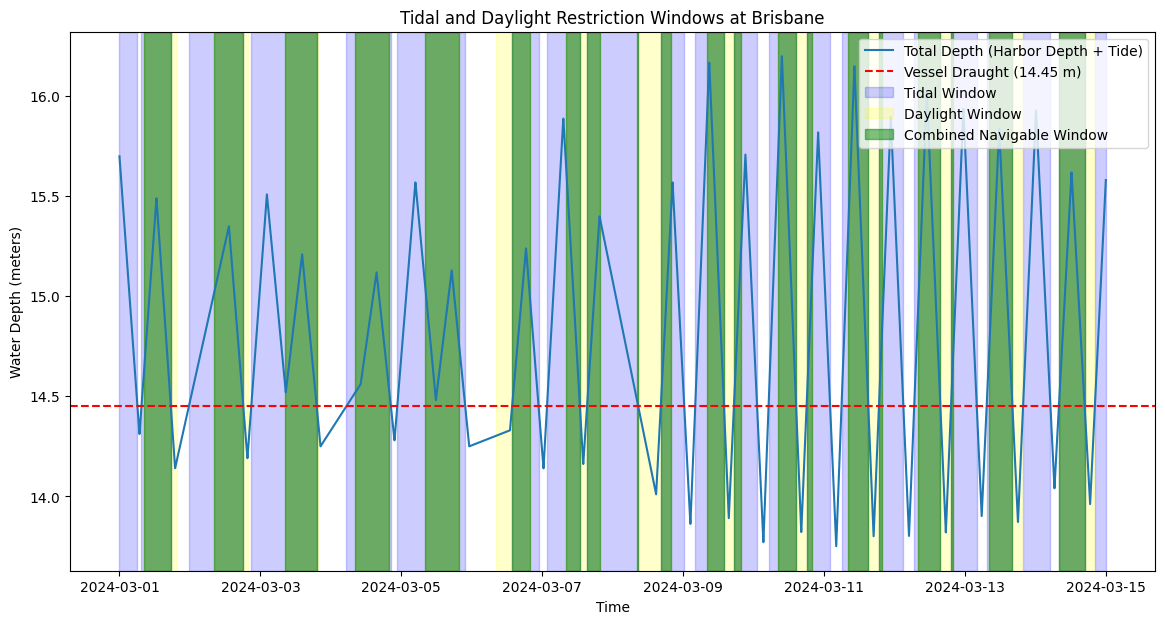

In [6]:
cassia.plot_combined_windows(
    imo=imo, 
    unlocode=unlocode
)


# Examples for more Ports

## Abbot Point	

{
  "port_id": "AUABP",
  "vessel_information": {
    "draught": "14.45",
    "dwt": "80276.0",
    "name": "EPIPHANIA",
    "imo": 9582116
  },
  "arrival_datetime": "2024-03-01T00:00:00"
}


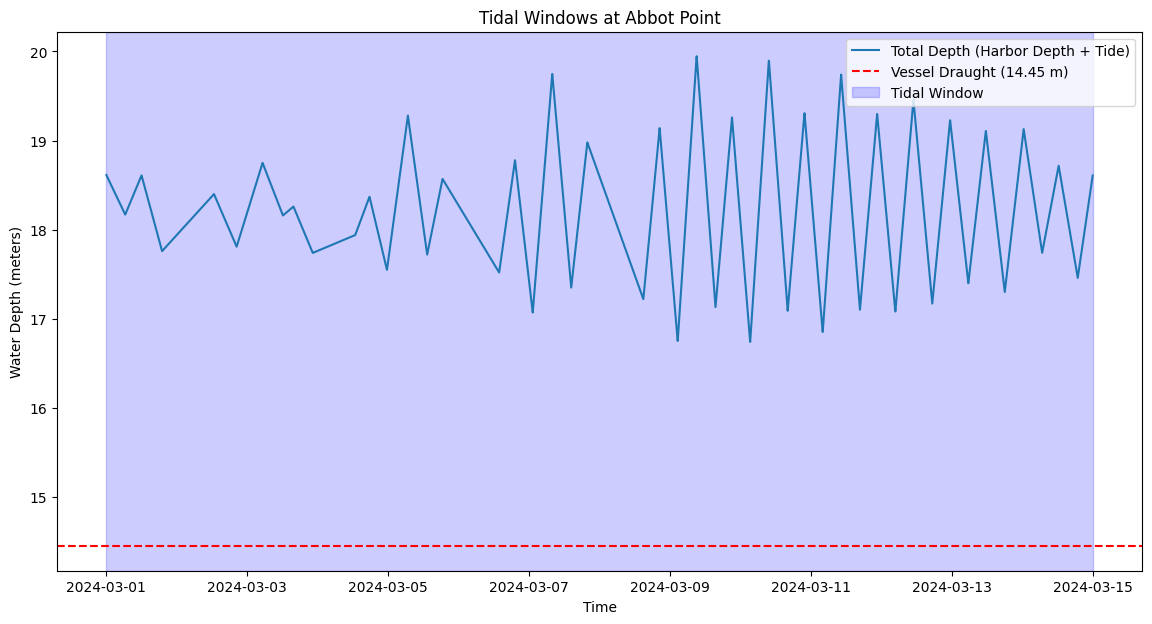

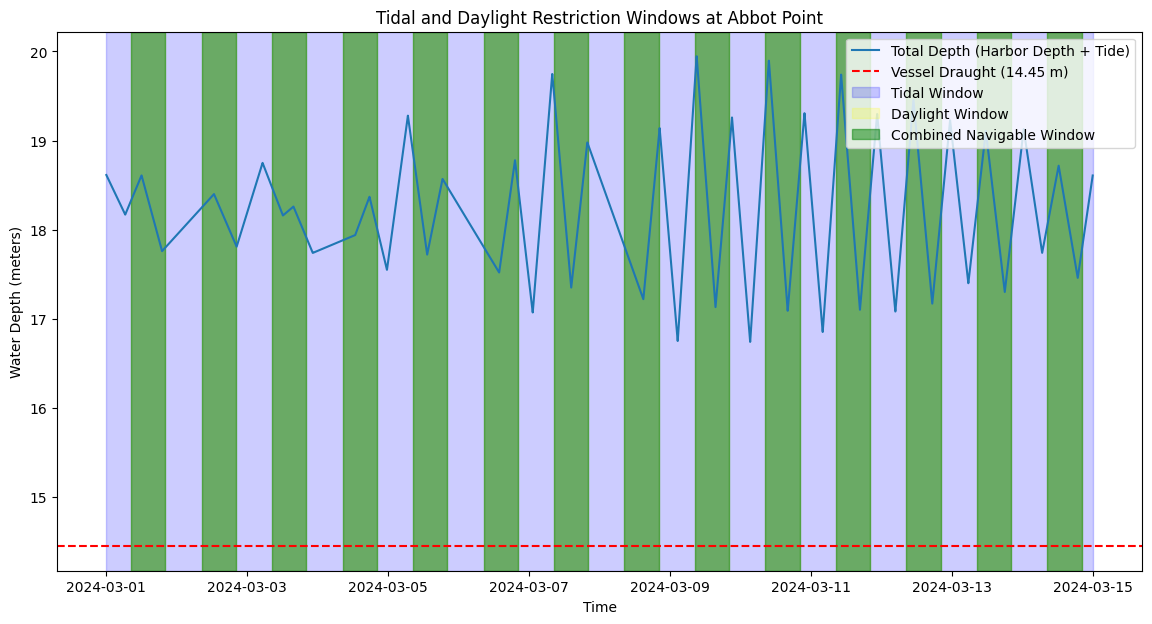

In [10]:
# Example usage of Brisbane with 01/03 2024 with the Epiphania ship
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # "EPIPHANIA"
unlocode = 'AUABP'  # Abbot Point	

# Mimic API
vessel_info = VesselInfo(
    draught=14.45,
    dwt=80276.0,
    name="EPIPHANIA",
    imo=imo
)

# Pydantic mimic
tidal_window_input = TidalWindowInput(
    port_id=unlocode,
    vessel_information=vessel_info,
    arrival_datetime=arrival_time
)

# JSON to show output
json_output = tidal_window_input.json()
print(json.dumps(json.loads(json_output), indent=2))

cassia = Cassia()

# Extract parameters from Pydantic class
imo = tidal_window_input.vessel_information.imo
unlocode = tidal_window_input.port_id
arrival_time = tidal_window_input.arrival_datetime

tidal_windows = cassia.get_tidal_windows(
    imo=imo,
    unlocode=unlocode,
    arrival_time=arrival_time
)


cassia.get_combined_windows(
    imo=imo, 
    unlocode=unlocode, 
    arrival_time=arrival_time
)

cassia.plot_tidal_windows(
    imo=imo,
    unlocode=unlocode
)

cassia.plot_combined_windows(
    imo=imo, 
    unlocode=unlocode
)


## Cooktown

{
  "port_id": "AUCTN",
  "vessel_information": {
    "draught": "14.45",
    "dwt": "80276.0",
    "name": "EPIPHANIA",
    "imo": 9582116
  },
  "arrival_datetime": "2024-03-01T00:00:00"
}


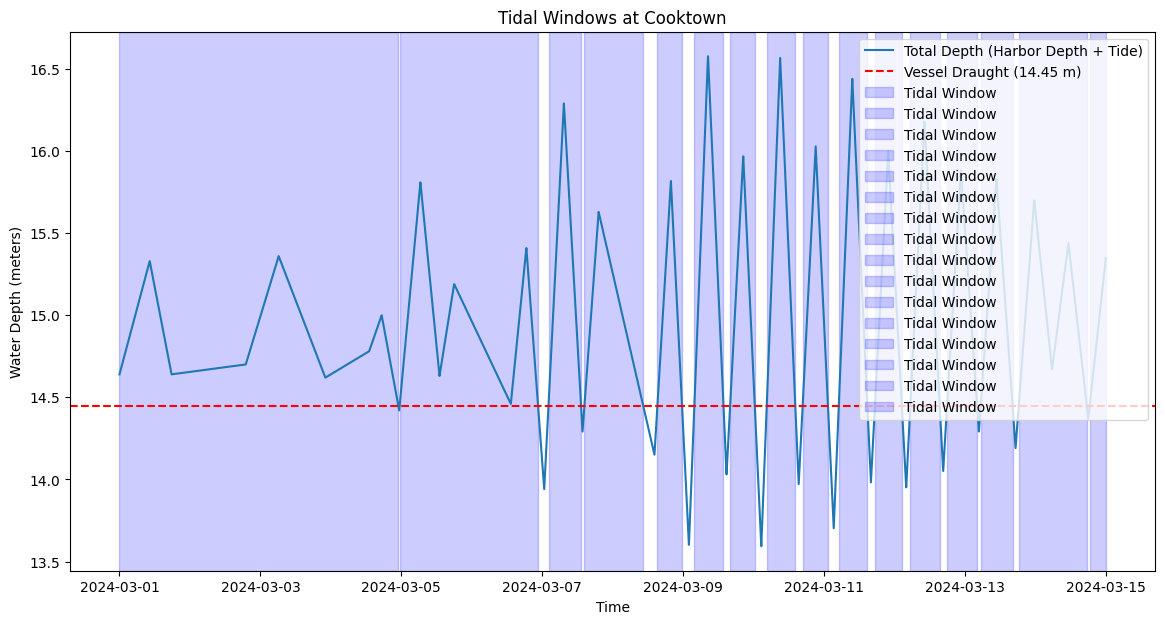

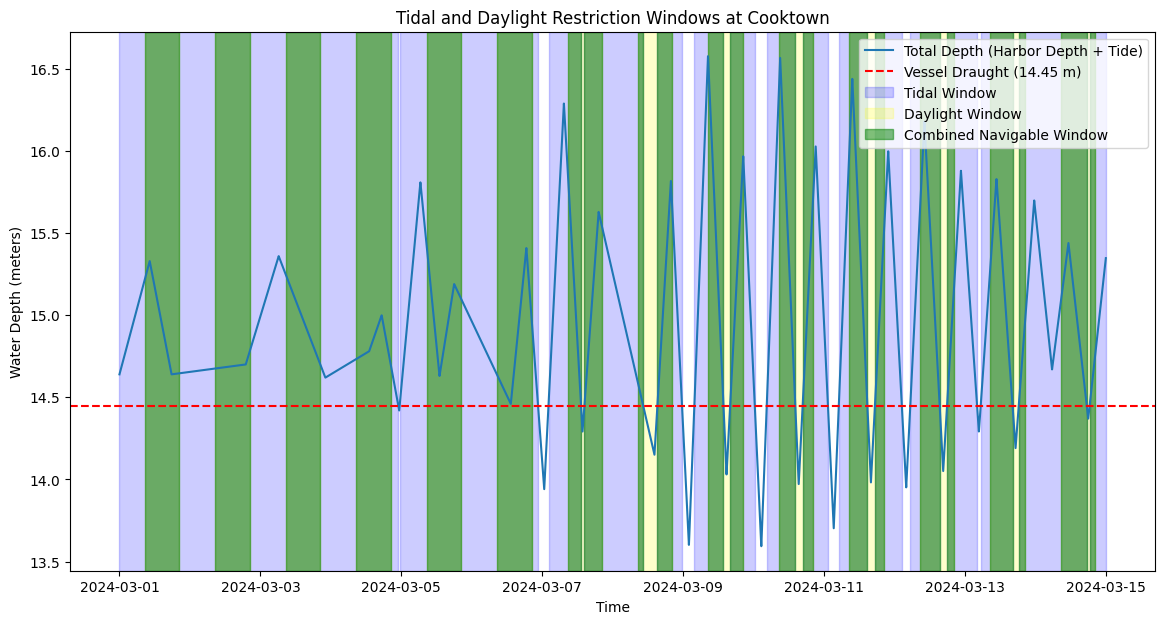

In [11]:
# Example usage of Brisbane with 01/03 2024 with the Epiphania ship
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # "EPIPHANIA"
unlocode = 'AUCTN'  # Cooktown

# Mimic API
vessel_info = VesselInfo(
    draught=14.45,
    dwt=80276.0,
    name="EPIPHANIA",
    imo=imo
)

# Pydantic mimic
tidal_window_input = TidalWindowInput(
    port_id=unlocode,
    vessel_information=vessel_info,
    arrival_datetime=arrival_time
)

# JSON to show output
json_output = tidal_window_input.json()
print(json.dumps(json.loads(json_output), indent=2))

cassia = Cassia()

# Extract parameters from Pydantic class
imo = tidal_window_input.vessel_information.imo
unlocode = tidal_window_input.port_id
arrival_time = tidal_window_input.arrival_datetime

tidal_windows = cassia.get_tidal_windows(
    imo=imo,
    unlocode=unlocode,
    arrival_time=arrival_time
)


cassia.get_combined_windows(
    imo=imo, 
    unlocode=unlocode, 
    arrival_time=arrival_time
)

cassia.plot_tidal_windows(
    imo=imo,
    unlocode=unlocode
)

cassia.plot_combined_windows(
    imo=imo, 
    unlocode=unlocode
)


## Dampier

{
  "port_id": "AUDAM",
  "vessel_information": {
    "draught": "14.45",
    "dwt": "80276.0",
    "name": "EPIPHANIA",
    "imo": 9582116
  },
  "arrival_datetime": "2024-03-01T00:00:00"
}


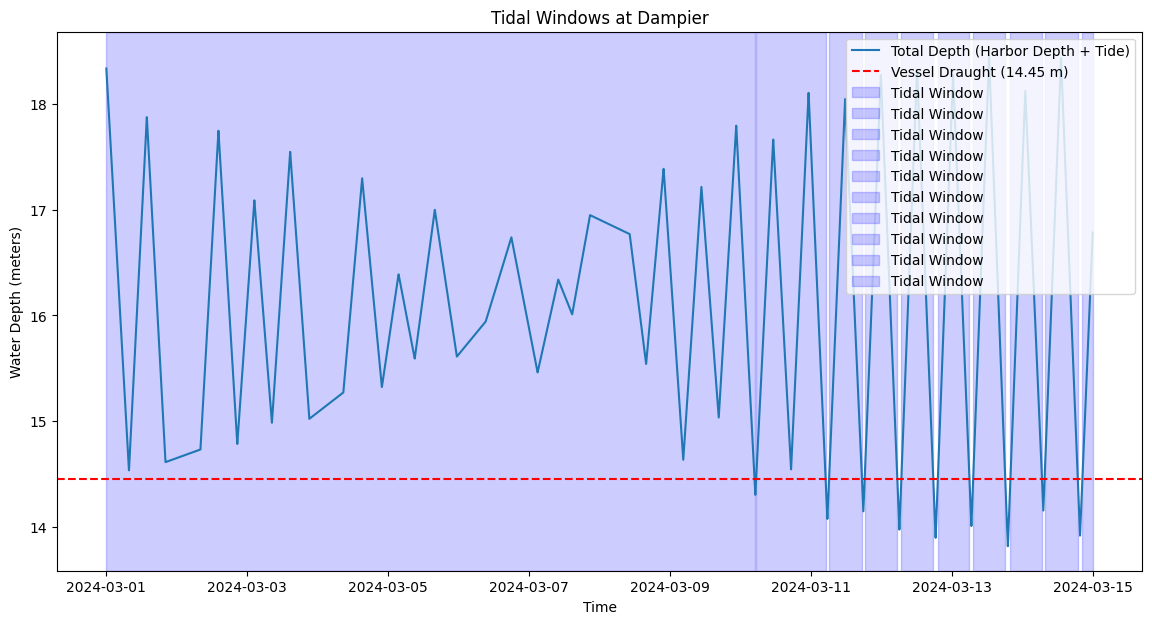

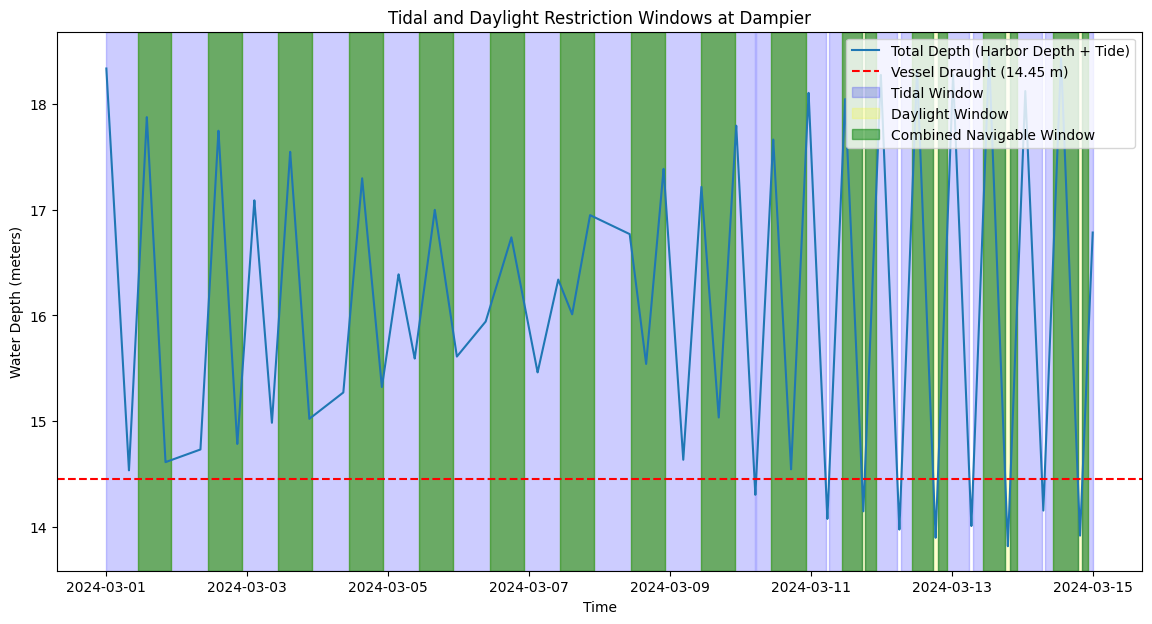

In [12]:
# Example usage of Brisbane with 01/03 2024 with the Epiphania ship
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # "EPIPHANIA"
unlocode = 'AUDAM'  # Dampier

# Mimic API
vessel_info = VesselInfo(
    draught=14.45,
    dwt=80276.0,
    name="EPIPHANIA",
    imo=imo
)

# Pydantic mimic
tidal_window_input = TidalWindowInput(
    port_id=unlocode,
    vessel_information=vessel_info,
    arrival_datetime=arrival_time
)

# JSON to show output
json_output = tidal_window_input.json()
print(json.dumps(json.loads(json_output), indent=2))

cassia = Cassia()

# Extract parameters from Pydantic class
imo = tidal_window_input.vessel_information.imo
unlocode = tidal_window_input.port_id
arrival_time = tidal_window_input.arrival_datetime

tidal_windows = cassia.get_tidal_windows(
    imo=imo,
    unlocode=unlocode,
    arrival_time=arrival_time
)


cassia.get_combined_windows(
    imo=imo, 
    unlocode=unlocode, 
    arrival_time=arrival_time
)

cassia.plot_tidal_windows(
    imo=imo,
    unlocode=unlocode
)

cassia.plot_combined_windows(
    imo=imo, 
    unlocode=unlocode
)
